In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
nltk.download('stopwords')
# %config InlineBackend.figure_format = 'retina'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
filename = "/content/spam.csv"
data = pd.read_csv(filename, encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
#drop unwanted columns and name change
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [7]:
# convert label to a numerical variable
data['label_cat'] = data.label.map({'ham':0, 'spam':1})

In [8]:
corpus = []
for i in range(0, len(data)):
    text_spam = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    text_spam = text_spam.lower()
    text_spam = text_spam.split()
    porterstemmer = PorterStemmer()
    text_spam = [porterstemmer.stem(word) for word in text_spam if not word in set(stopwords.words('english'))]
    text_spam = ' '.join(text_spam)
    corpus.append(text_spam)

In [9]:
# Creating the Bag of Words model
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 0].values
     


In [10]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [11]:
#Visualisations
from wordcloud import WordCloud

In [12]:
hamwords = ''
spamwords = ''
spam = data[data.label_cat == 1]
ham = data[data.label_cat == 0]

In [13]:
for val in spam.text:
    text = re.sub('[^a-zA-Z]', ' ', val)
    text = text.lower()
    text = text.split()
    porterstemmer = PorterStemmer()
    text = [porterstemmer.stem(word) for word in text if not word in set(stopwords.words('english'))]
    for words in text:
        spamwords = spamwords + words + ' '
    
for val in ham.text:
    text = re.sub('[^a-zA-Z]', ' ', val)
    text = text.lower()
    text = text.split()
    porterstemmer = PorterStemmer()
    text = [porterstemmer.stem(word) for word in text if not word in set(stopwords.words('english'))]
    for words in text:
          hamwords = hamwords + words + ' '
      
     


In [14]:
# Generate a word cloud image
spamwordcloud = WordCloud(width=400, height=400).generate(spamwords)
hamwordcloud = WordCloud(width=400, height=400).generate(hamwords)

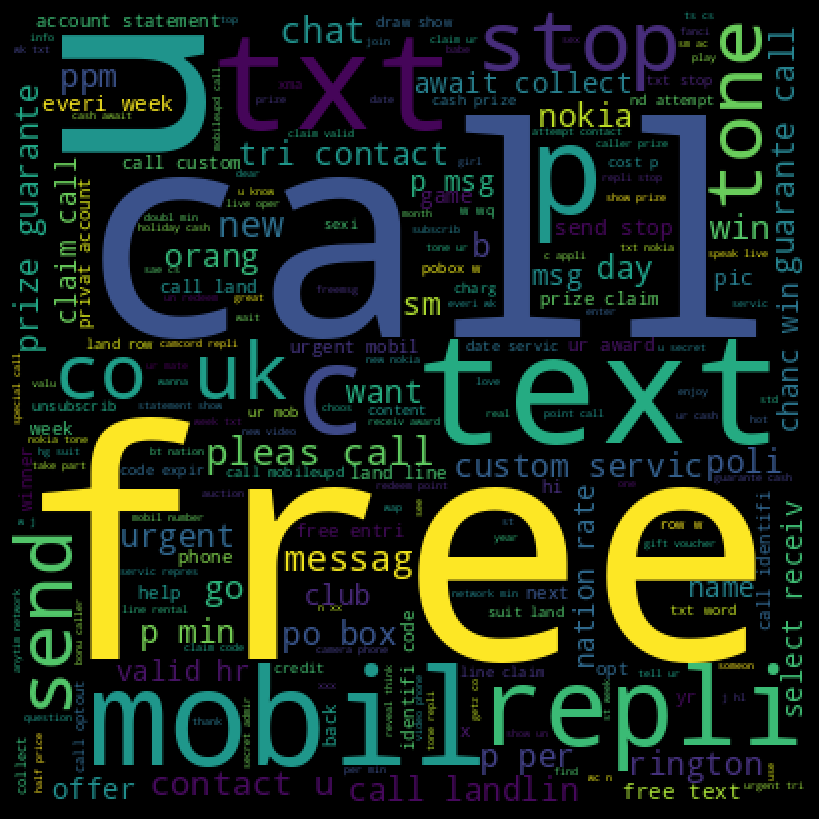

In [15]:
#Spam Word cloud
plt.figure( figsize=(8,8), facecolor='k')
plt.imshow(spamwordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

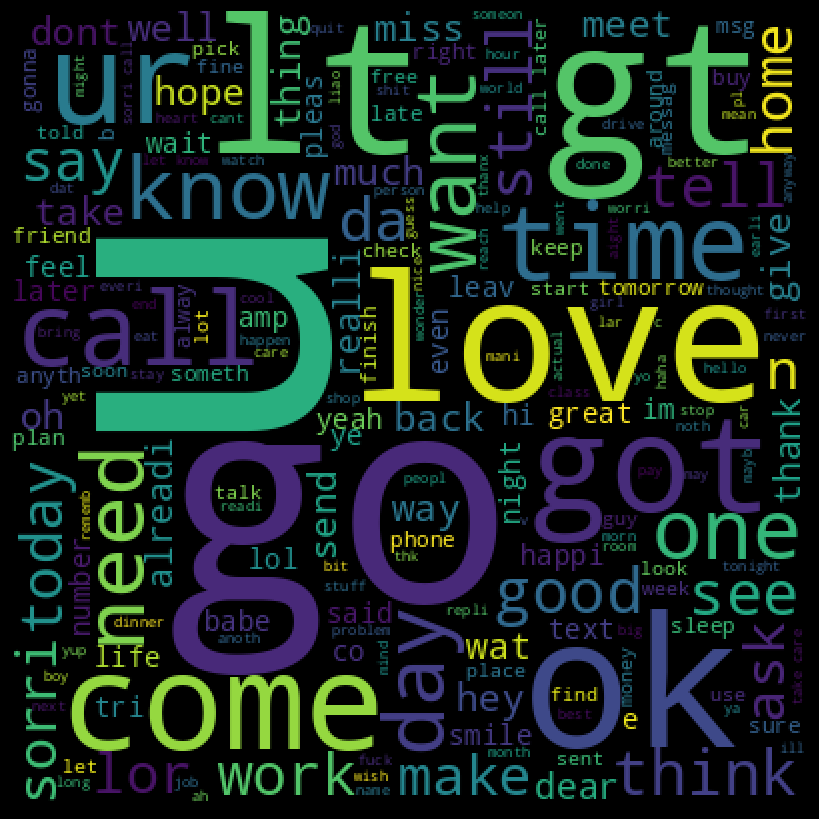

In [16]:
#Ham word cloud
plt.figure( figsize=(8,8), facecolor='k')
plt.imshow(hamwordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [17]:
data['text_len'] = data['text'].apply(len)
data.head()

,label,text,label_cat,text_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [18]:
data.groupby('label').describe().T

label                    ham        spam
label_cat count  4825.000000  747.000000
          mean      0.000000    1.000000
          std       0.000000    0.000000
          min       0.000000    1.000000
          25%       0.000000    1.000000
          50%       0.000000    1.000000
          75%       0.000000    1.000000
          max       0.000000    1.000000
text_len  count  4825.000000  747.000000
          mean     71.023627  138.866131
          std      58.016023   29.183082
          min       2.000000   13.000000
          25%      33.000000  132.500000
          50%      52.000000  149.000000
          75%      92.000000  157.000000
          max     910.000000  224.000000

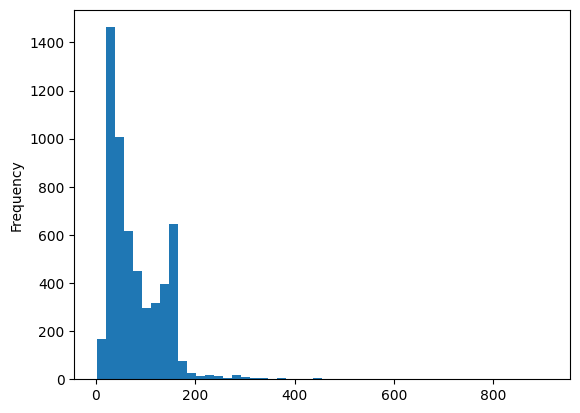

In [19]:
data['text_len'].plot(kind='hist',bins=50)
plt.show()
     

Text(0.5, 1.0, 'listing_type')

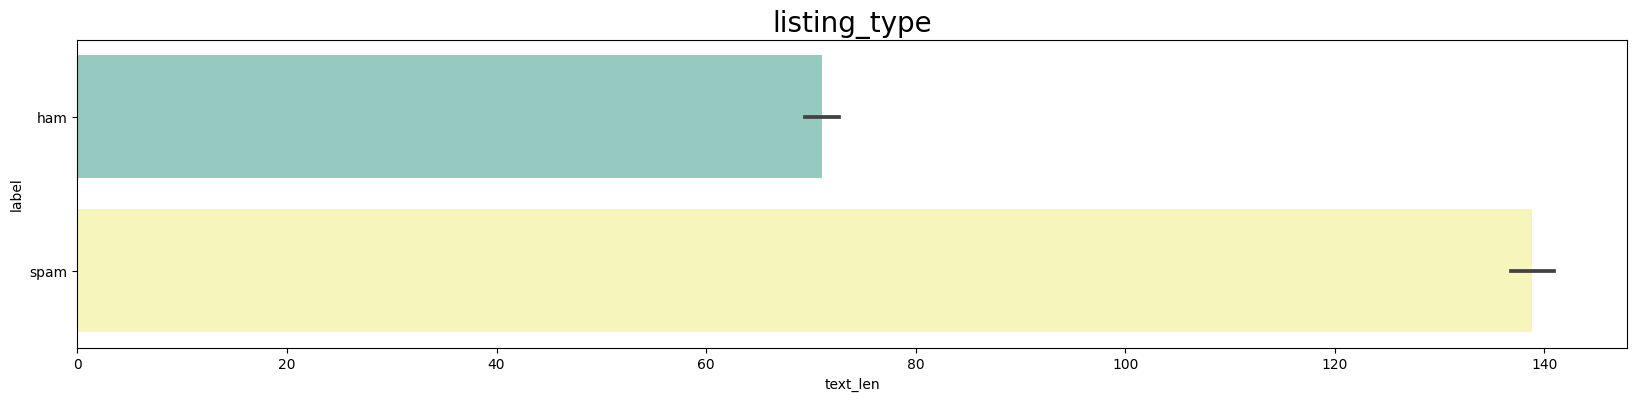

In [20]:
# sns.barplot(data['Mes_len'],data['label'])
# plt.show()
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='text_len',y='label',ax=ax,data=data,palette='Set3')
plt.title("listing_type",fontsize=20)

In [21]:
data.groupby('label')['text_len'].max()

label
ham     910
spam    224
Name: text_len, dtype: int64

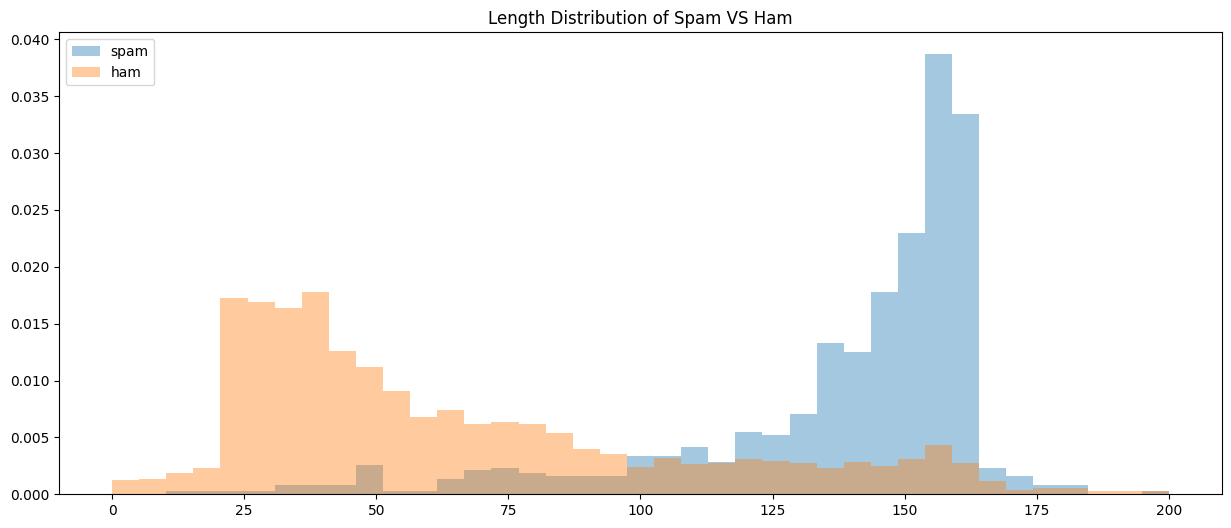

In [22]:
# Plot the distribution of text length (spam vs ham)
plt.figure(figsize=(15,6))
plt.hist(data[data['label_cat']==1]['text_len'],bins = np.linspace(0,200,num=40),alpha=0.4,label='spam',density=True)
plt.hist(data[data['label_cat']==0]['text_len'],bins = np.linspace(0,200,num=40),alpha =0.4,label ='ham', density=True)
plt.legend(loc ='upper left')
plt.title('Length Distribution of Spam VS Ham')
plt.show()

In [23]:
def text_process(clean):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') 
    # Check characters to see if they are in punctuation
    nopunc = [char for char in clean if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [24]:
data['clean_text'] = data.text.apply(text_process)
data.head()
data['clean_text'].fillna("unknown", inplace=True)
     

In [25]:
type(stopwords.words('english'))


list

In [26]:
words = data[data.label=='ham'].clean_text.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
ham_words.most_common(50)
     

[('u', 972),
 ('im', 449),
 ('2', 305),
 ('get', 303),
 ('ltgt', 276),
 ('ok', 272),
 ('dont', 257),
 ('go', 247),
 ('ur', 240),
 ('ill', 236),
 ('know', 232),
 ('got', 231),
 ('like', 229),
 ('call', 229),
 ('come', 224),
 ('good', 222),
 ('time', 189),
 ('day', 187),
 ('love', 185),
 ('4', 168),
 ('going', 167),
 ('want', 163),
 ('one', 162),
 ('home', 160),
 ('lor', 160),
 ('need', 156),
 ('sorry', 153),
 ('still', 146),
 ('see', 137),
 ('n', 134),
 ('later', 134),
 ('da', 131),
 ('r', 131),
 ('back', 129),
 ('think', 128),
 ('well', 126),
 ('today', 125),
 ('send', 123),
 ('tell', 121),
 ('cant', 118),
 ('ì', 117),
 ('hi', 117),
 ('take', 112),
 ('much', 112),
 ('oh', 111),
 ('night', 107),
 ('hey', 106),
 ('happy', 105),
 ('great', 100),
 ('way', 100)]

In [27]:
# Word2Vec modeling.
s = 32 
model = Word2Vec(words,min_count=10)

# Get specified vocabulary's vector. 
model.wv['get']
model.wv.most_similar("get")

[('dont', 0.9995021820068359),
 ('man', 0.9994774460792542),
 ('im', 0.9994773268699646),
 ('even', 0.999475359916687),
 ('cos', 0.9994729161262512),
 ('today', 0.9994703531265259),
 ('got', 0.9994667768478394),
 ('think', 0.9994639158248901),
 ('give', 0.9994627833366394),
 ('life', 0.9994580149650574)]

In [28]:
words = data[data.label=='spam'].clean_text.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
spam_words.most_common(50)

[('call', 347),
 ('free', 216),
 ('2', 173),
 ('txt', 150),
 ('u', 147),
 ('ur', 144),
 ('mobile', 123),
 ('text', 120),
 ('4', 119),
 ('claim', 113),
 ('stop', 113),
 ('reply', 101),
 ('prize', 92),
 ('get', 83),
 ('new', 69),
 ('send', 67),
 ('nokia', 65),
 ('urgent', 63),
 ('cash', 62),
 ('win', 60),
 ('contact', 56),
 ('service', 55),
 ('please', 52),
 ('guaranteed', 50),
 ('customer', 49),
 ('16', 49),
 ('week', 49),
 ('tone', 48),
 ('per', 46),
 ('phone', 45),
 ('18', 43),
 ('chat', 42),
 ('awarded', 38),
 ('draw', 38),
 ('latest', 36),
 ('å£1000', 35),
 ('line', 35),
 ('150ppm', 34),
 ('mins', 34),
 ('receive', 33),
 ('camera', 33),
 ('1', 33),
 ('every', 33),
 ('message', 32),
 ('holiday', 32),
 ('landline', 32),
 ('shows', 31),
 ('å£2000', 31),
 ('go', 31),
 ('box', 30)]

In [29]:
# Word2Vec modeling. 
model = Word2Vec(words,min_count=10)

# Get specified vocabulary's vector. 
model.wv['call']
model.wv.most_similar("call")


[('u', 0.9995085597038269),
 ('text', 0.9994280338287354),
 ('2', 0.9994093775749207),
 ('reply', 0.9994037747383118),
 ('claim', 0.9993426203727722),
 ('mobile', 0.9993388652801514),
 ('free', 0.9993171691894531),
 ('txt', 0.9993029832839966),
 ('vouchers', 0.9992794990539551),
 ('nokia', 0.9992676973342896)]

In [30]:
# Word2Vec modeling. 
model = Word2Vec(words,min_count=10)

# Get specified vocabulary's vector. 
model.wv['free']
model.wv.most_similar("free")

[('call', 0.9993151426315308),
 ('u', 0.9992462396621704),
 ('2', 0.9991406202316284),
 ('txt', 0.9991405606269836),
 ('reply', 0.9990811347961426),
 ('vouchers', 0.9990452527999878),
 ('text', 0.9990217089653015),
 ('ur', 0.998971700668335),
 ('mobile', 0.9989640116691589),
 ('cash', 0.9989574551582336)]

In [31]:
!pip install readability

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for readability: filename=readability-0.3.1-py3-none-any.whl size=35477 sha256=6e9256bc08c635eba06f7a817e0d8a1e6f661ea01dbe389cda6119681e9fdebb
  Stored in directory: /root/.cache/pip/wheels/05/07/4d/2e3a0aaba1713619a403e1a3c56e88a6fc12d753872b98771c
Successfully built readability


In [32]:
import readability
count=0
readability_list = []
final_list = []
txt = data['clean_text']
for i in txt:
  if not i.strip():
    final_list.append(0)
  else:
    results = readability.getmeasures(i, lang='en')
    readability_list = results['readability grades']['FleschReadingEase']
    final_list.append(readability_list)
data['readability_score'] = final_list
data.describe()

,label_cat,text_len,readability_score
count,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,87.069161
std,0.340751,59.690841,40.501879
min,0.000000,2.000000,-555.580000
25%,0.000000,36.000000,66.400000
50%,0.000000,61.000000,88.368636
75%,0.000000,121.000000,112.085000
max,1.000000,910.000000,205.820000


In [33]:
data.describe()

,label_cat,text_len,readability_score
count,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,87.069161
std,0.340751,59.690841,40.501879
min,0.000000,2.000000,-555.580000
25%,0.000000,36.000000,66.400000
50%,0.000000,61.000000,88.368636
75%,0.000000,121.000000,112.085000
max,1.000000,910.000000,205.820000


In [34]:
def ReadabilityCategorize(x):
    if x<85:
        return 0
    elif x>=85:
        return 1
    else:
        return 0
    
data.insert(4, "readability_cat", data.apply(lambda row: ReadabilityCategorize(row['readability_score']), axis=1))
data

,label,text,label_cat,text_len,readability_cat,clean_text,readability_score
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,0,Go jurong point crazy Available bugis n great ...,79.557500
1,ham,Ok lar... Joking wif u oni...,0,29,1,Ok lar Joking wif u oni,102.045000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,1,Free entry 2 wkly comp win FA Cup final tkts 2...,98.890000
3,ham,U dun say so early hor... U c already then say...,0,49,1,U dun say early hor U c already say,113.100000
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,1,Nah dont think goes usf lives around though,92.965000
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,1,2nd time tried 2 contact u U å£750 Pound prize...,108.977143
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,1,Ì b going esplanade fr home,130.245000
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,0,Pity mood Soany suggestions,33.575000
5570,ham,The guy did some bitching but I acted like i'd...,0,125,0,guy bitching acted like id interested buying s...,65.725000


In [35]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [36]:
X = data['clean_text']
y = data['label_cat']
     

In [37]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X)

X_vec = vect.transform(X)

# len(vect.get_feature_names())
     

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.1, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5014, 2316)
(558, 2316)
(5014,)
(558,)


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model_lr = Pipeline([('tfidf', TfidfTransformer()),
                   ('model',LogisticRegression()),
                   ])

model_lr.fit(X_train,y_train)

ytest = np.array(y_test)
pred_y = model_lr.predict(X_test)
     


# Create confusion matrix
cm1 = confusion_matrix(ytest, pred_y)

# Print the confusion matrix
print(cm1)


[[464   1]
 [ 24  69]]


In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.9551971326164874
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       465
           1       0.99      0.74      0.85        93

    accuracy                           0.96       558
   macro avg       0.97      0.87      0.91       558
weighted avg       0.96      0.96      0.95       558



In [41]:
from sklearn.naive_bayes import MultinomialNB

model_nb = Pipeline([('tfidf', TfidfTransformer()),
                   ('model',MultinomialNB()),
                   ])

model_nb.fit(X_train,y_train)

ytest = np.array(y_test)
pred = model_nb.predict(X_test)

# Create confusion matrix
cm2 = confusion_matrix(ytest, pred)

# Print the confusion matrix
print(cm2)
     

[[464   1]
 [ 18  75]]


In [42]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.9659498207885304
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       465
           1       0.99      0.81      0.89        93

    accuracy                           0.97       558
   macro avg       0.97      0.90      0.93       558
weighted avg       0.97      0.97      0.96       558



In [43]:
from sklearn.ensemble import RandomForestClassifier

model_rf = Pipeline([('tfidf', TfidfTransformer()),
                   ('model',RandomForestClassifier(n_estimators=50)),
                   ])

model_rf.fit(X_train,y_train)

ytest = np.array(y_test)
preds = model_rf.predict(X_test)
# Create confusion matrix
cm3 = confusion_matrix(ytest, preds)

# Print the confusion matrix
print(cm3)


[[463   2]
 [ 15  78]]


In [44]:
print('accuracy %s' % accuracy_score(preds, y_test))
print(classification_report(ytest, preds))
     


accuracy 0.9695340501792115
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       465
           1       0.97      0.84      0.90        93

    accuracy                           0.97       558
   macro avg       0.97      0.92      0.94       558
weighted avg       0.97      0.97      0.97       558



In [45]:
log_acc = accuracy_score(pred_y, y_test)
nb_acc = accuracy_score(pred, y_test)
rf_acc = accuracy_score(preds, y_test)

In [46]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest'],
                      'Score': [log_acc, nb_acc, rf_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.969534
1,Naive Bayes,0.965950
0,Logistic Regression,0.955197
